# Name - SHAIK MADEENA
# Lets Grow More Data Science Internship Task 2 (Intermediate Level Task)
# Prediction Using Decision Tree Algorithm

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix
from sklearn import tree

## READ THE FILE

In [3]:
data=pd.read_csv('Iris.csv')

## GET FIRST FIVE ROWS OF DATAFRAME

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## GET SHAPE OF DATAFRAME

In [5]:
data.shape

(150, 6)

## GET COLUMNS OF DATAFRAME

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## GET SUMMARY OF DATAFRAME

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## GET STATISTICAL SUMMARY OF DATAFRAME

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## CHECKING NULL VALUES

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## CHECKING COUNT OF SPECIES

In [11]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

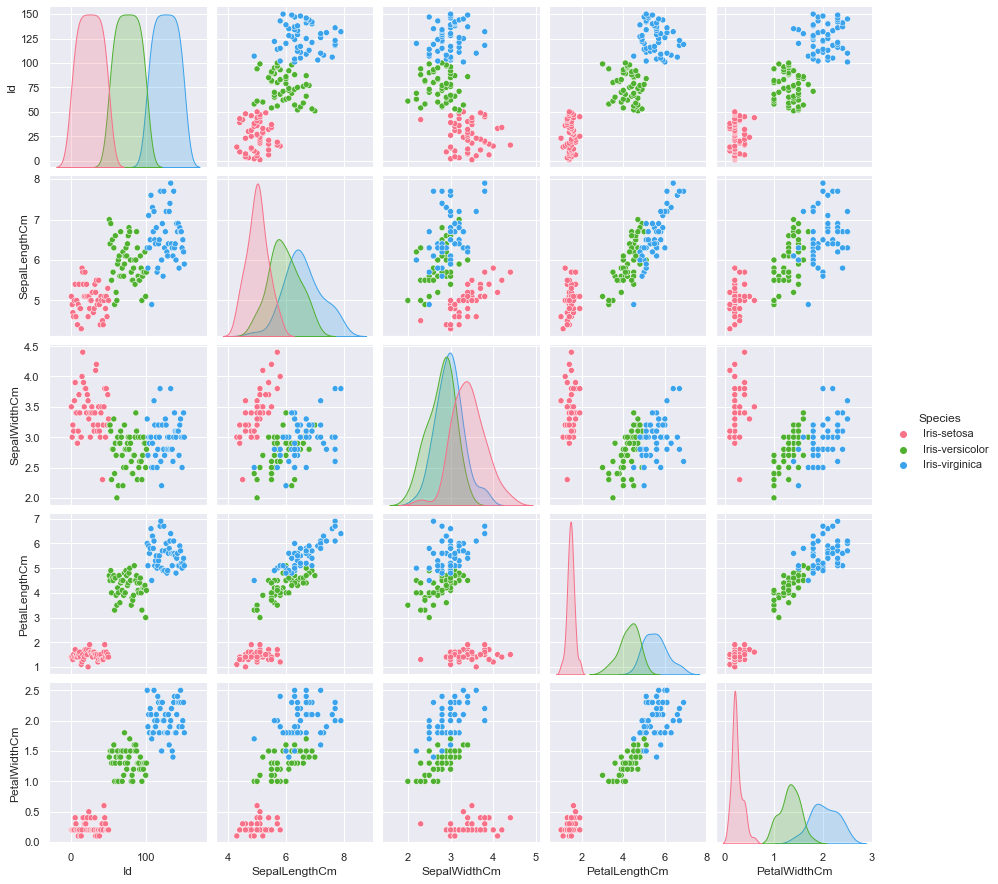

In [12]:
sns.set(rc={'figure.figsize':(14,6)})
sns.pairplot(data,hue='Species',palette='husl')

<AxesSubplot:>

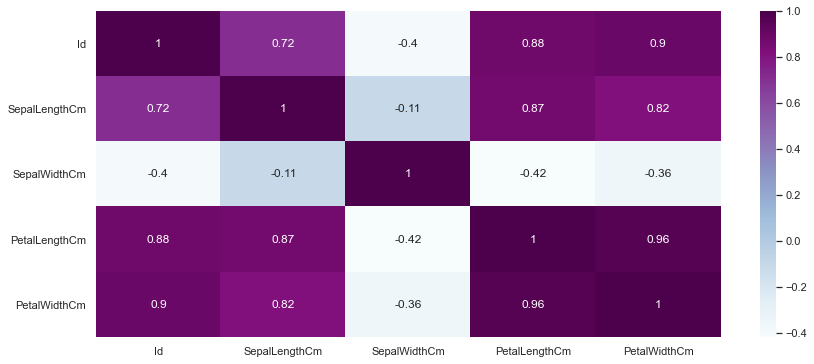

In [14]:
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

## EXTRACT DEPENDENT AND INDEPENDENT FEATURES

In [15]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X=data.loc[:,features].values
y=data.Species

## TRAIN TEST SPLIT

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

## MODEL TRAINING AND PREDICTIONS

In [17]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

## PREDICTION ON TEST DATA

In [18]:
y_pred=dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

## CHECKING ACCURACY OF MODEL

In [19]:
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


## CONFUSION MATRIX

In [22]:
def report(model):
  preds=model.predict(X_test)
  print(classification_report(preds,y_test))
  plot_confusion_matrix(model,X_test,y_test,cmap='BuPu')

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Accuracy:96.0%


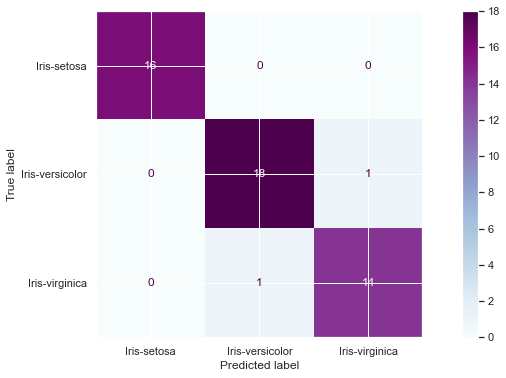

In [23]:
print('Decision Tree Classifier')
report(dtree)
print(f'Accuracy:{round(score*100,2)}%')

## VISUALIZING DECISION TREE

[Text(418.5, 498.3, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(334.8, 407.70000000000005, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(502.20000000000005, 407.70000000000005, 'petal width(cm) <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(334.8, 317.1, 'petal length(cm) <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 226.5, 'sepal length(cm) <= 5.0\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Iris-versicolor'),
 Text(167.4, 135.89999999999998, 'petal width(cm) <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(83.7, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(334.8, 135.899

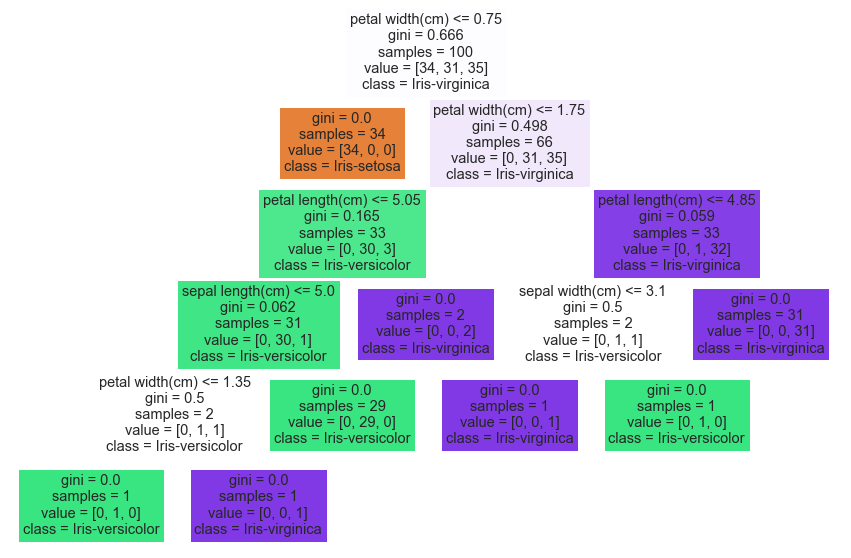

In [24]:
feature_name=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name=data.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True,feature_names=feature_name,class_names=class_name)

## HYPERPARAMETER TUNING

In [25]:
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4],'max_depth':[4,5,6,7]}

In [26]:
grid_search_cv=GridSearchCV(DecisionTreeClassifier(random_state=101),params,verbose=1,cv=3)
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3528 out of 3528 | elapsed:   11.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [27]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}

In [28]:
grid_search_cv.best_score_

0.9497920380273323

## BUILDING TREE USING BEST PARAMETERS

In [29]:
model=DecisionTreeClassifier(max_depth=4,max_leaf_nodes=4,min_samples_split=2)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

In [30]:
pred=model.predict(X_test)

In [31]:
score=accuracy_score(y_test,pred)
print("Accuracy of Model:",score)

Accuracy of Model: 0.98


Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

Accuracy:98.0%


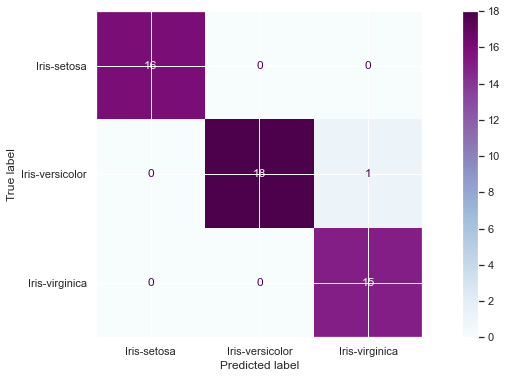

In [32]:
print('Decision Tree Classifier')
report(model)
print(f'Accuracy:{round(score*100,2)}%')

## VISUALIZING DECISION TREE

[Text(178.56, 285.39000000000004, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(89.28, 203.85000000000002, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(267.84000000000003, 203.85000000000002, 'petal length(cm) <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(178.56, 122.31, 'petal width(cm) <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(89.28, 40.76999999999998, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(267.84000000000003, 40.76999999999998, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(357.12, 122.31, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = Iris-virginica')]

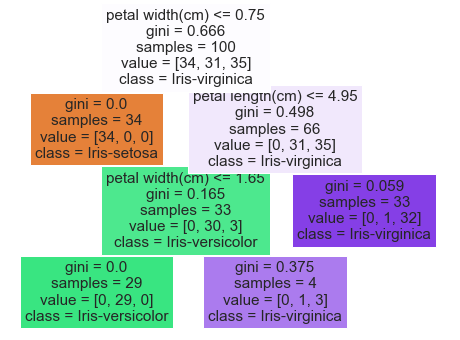

In [33]:
feature_name=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name=data.Species.unique()
plt.figure(figsize=(8,6))
tree.plot_tree(model,filled=True,feature_names=feature_name,class_names=class_name)

In [34]:
input_data=(6.0,3.6,2.6,1.2)
input_data_as_nparray=np.asarray(input_data)
input_data_reshaped=input_data_as_nparray.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print("The category is",prediction)

The category is ['Iris-versicolor']


## TESTING FOR NEW POINTS EXCEPT FROM DATASET

In [35]:
Test_point=[[5.4,3.0,1.5,-1.5],
            [6.5,2.8,1.5,1.3],
            [5.0,3.6,2.6,1.2],
            [5.1,3.3,0.5,1.6],
            [6.0,5.1,1.6,1.1],
            [5.0,3.6,2.6,2.2]]
print(model.predict(Test_point))

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica']
